In [1]:
import numpy as np

def twospins(omI,omII,gam):
    hbar = 1.
    paulis = paulimatrices()
    iden = np.identity(2)

    SIs = [hbar*kron(pa,iden)/2 for pa in paulis]
    SIIs = [hbar*kron(iden,pa)/2 for pa in paulis]
    SIdotII = sum([SIs[i]@SIIs[i] for i in range(3)])

    H = -omI*SIs[2] - omII*SIIs[2] + gam*SIdotII
    H = H.real
    return H

def paulimatrices():
    sigx = np.array([0.,1,1,0]).reshape(2,2)
    sigy = np.array([0.,-1j,1j,0]).reshape(2,2)
    sigz = np.array([1.,0,0,-1]).reshape(2,2)
    return sigx, sigy, sigz

def kron(U,V):
    n = U.shape[0]
    p = V.shape[0]
    W = np.zeros((n*p,n*p), dtype=np.complex64)
    for i in range(n):
        for k in range(n):
            for j in range(p):
                for l in range(p):
                    W[p*i+j,p*k+l] = U[i,k]*V[j,l]
    return W

def qrmet(inA,kmax=100):
    A = np.copy(inA)
    for k in range(1,kmax):
        Q, R = qrdec(A)
        A = R@Q
        # print(k, np.diag(A))
    qreigvals = np.diag(A)
    return qreigvals

def qrdec(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j):
            R[i,j] = Q[:,i]@A[:,j]
            Ap[:,j] -= R[i,j]*Q[:,i]

        R[j,j] = mag(Ap[:,j])
        Q[:,j] = Ap[:,j]/R[j,j]
    return Q, R

def mag(xs):
    return np.sqrt(np.sum(xs*xs))


if __name__ == '__main__':
    gam = 1
    list_of_lists = []
    for i in range(0, 4):
        wI = i
        wII = 2 * wI
        H = twospins(wI,wII,gam)
        qreigvals = np.array(qrmet(H))
        list_of_lists.append(qreigvals)

list_of_lists = np.array(list_of_lists)

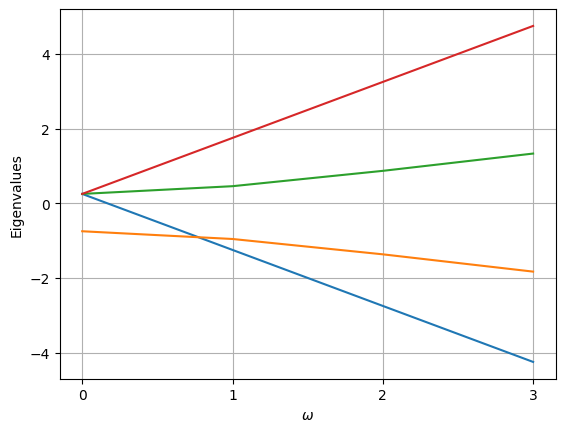

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(0,3, 4)
plt.plot(x, list_of_lists)
plt.xticks(x)
plt.grid()
plt.xlabel('$\omega$'), plt.ylabel('Eigenvalues')
plt.show()